In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# <font color="red">Replace the word "template" with your name in the filename and remove this red label.</font>
<font color="red">I have left explanations in the markdown to assist you. In your submitted report, you should erase my markdown text and replace it with descriptions of your own that show your understanding.</font>

# The Photoelectric Effect
by Student

## Introduction
Some history about Einstein using Planck's idea of particles of light. Really this idea dates back to Newton but Planck describe photons mathematically. 

Here is a photoelectric effect simulator. We should probably go over this together before lab so you have a mental picture. This is a conceptually challenging idea.
https://troymessina.github.io/simulations/photoelectric-effect/#sim-photoelectric-effect

Describe the math.

$$\begin{align}
E_{photon} &= \Phi + KE\\
\frac{hc}{\lambda} &= \Phi + V_{stop}\\
hf &= \Phi + V_{stop}
\end{align}$$

How does the experiment demonstrate light acting as photons?

## Experimental
* How does the apparatus work?
    * What is the stopping voltage? How is it controlled?
    * What is the photocurrent?
* What wavelengths of light will you be using? What is their source?
* What would you observe if the wavelength of light were too large?
* What will you vary/measure? What will you calculate?
    * See Figures 1, 2, and 3 in the file Photoelectric-Pasco.pdf.
* You will measure a photocurrent, but it is not used in calculations.
    * How does it contribute to uncertainty in your results?

## Results
For each wavelength of light in the upper UV and visible spectrum of mercury, we measure the photocurrent as a function of stopping potential. I don't show it, but students should do at least one wavelength with multiple light intensities, and explain why the results suggest particle rather than wave behavior of light.

In [33]:
wavelength = np.array([365, 405, 436, 546, 577])
V_365 = np.array([0,-0.033, -0.075, -0.158,-0.253,-0.363,-0.475,-0.594,-0.717,-0.854,-0.991,-1.148,-1.331,-1.635])
A_365 = np.array([648,600,550,500,450,400,350,300,250,200,150,100,50,0])
V_405 = np.array([0,-0.157,-0.365,-0.609,-0.865,-1.024,-1.281])
A_405 = np.array([242,200,150,100,50,25,0])
V_436 = np.array([0,-0.096,-0.243,-0.444,-0.62,-0.8,-1.057])
A_436 = np.array([290,250,200,150,100,50,0])
V_546 = np.array([0,-0.166,-0.313,-0.404,-0.529])
A_546 = np.array([162.9,100,50,25,0])
V_577 = np.array([0,-0.02,-0.1,-0.194,-0.285,-0.433])
A_577 = np.array([112,100,75,50,25,0])

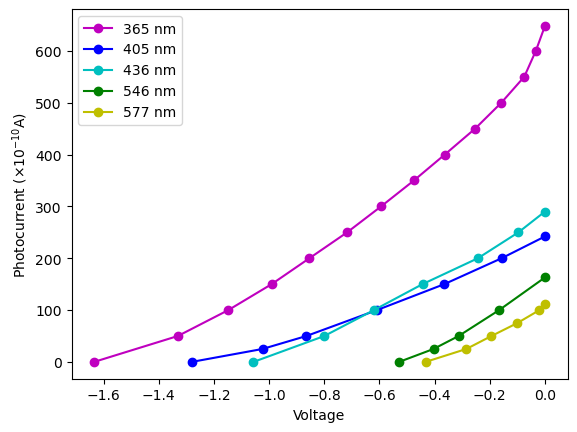

In [15]:
plt.plot(V_365, A_365, 'o-m', label='365 nm')
plt.plot(V_405, A_405, 'o-b', label='405 nm')
plt.plot(V_436, A_436, 'o-c', label='436 nm')
plt.plot(V_546, A_546, 'o-g', label='546 nm')
plt.plot(V_577, A_577, 'o-y', label='577 nm')
plt.xlabel('Voltage')
plt.ylabel(r'Photocurrent ($\times 10^{-10}$A)')
plt.legend()
plt.show()

The stopping potential is the negative bias when the current is completely stopped or equal to zero. This is the last data point of each wavelength. Even though some of the lines cross, the stopping potential where the photocurrent goes to zero increases as the wavelength decreases. We can plot the relationship

$$V_{stop} = \frac{hc}{\lambda} - \Phi$$

where $c/\lambda$ is the frequency of the light at each wavelength and $\Phi$ is the energy required to free an electron from the metal anode.

$$V_{stop} = hf - \Phi$$

The slope of this graph is the Planck constant $h$, and the y-intercept is the negative of work function $-\Phi$.

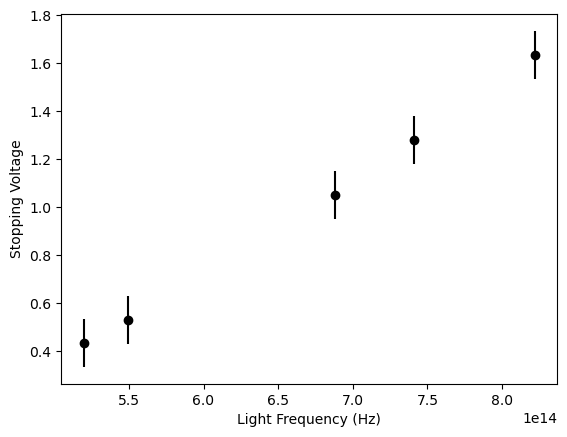

In [26]:
stopV = np.array([1.635, 1.281, 1.05, 0.529, 0.433])
stopV_unc = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
f = 3e8/wavelength*1e9
plt.errorbar(f, stopV, stopV_unc, fmt='ok')
plt.xlabel('Light Frequency (Hz)')
plt.ylabel('Stopping Voltage')
plt.show()

The relationship is linear. Next, we'll fit it with a line.

[ 3.96247735e-15 -1.64557464e+00] [[3.91377445e-16 1.00852632e-08]
 [1.00852632e-08 2.63703289e-01]]


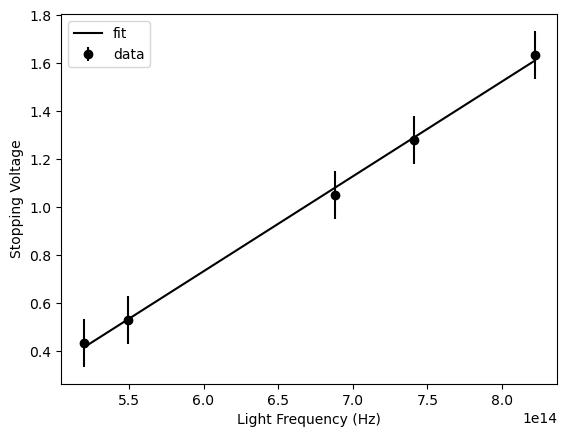

In [32]:
#define the fit function
def f_line(x, m, b):
    return m*x+b

#do the curve fit and print the results
fit_params, fit_cov = curve_fit(f_line, f, stopV, (1e-15, 0.1), sigma=stopV_unc, absolute_sigma=True)
print(fit_params, np.sqrt(np.abs(fit_cov)))

#Plot the data and fit
plt.errorbar(f, stopV, stopV_unc, fmt='ok', label='data')
plt.plot(f, fit_params[0]*f+fit_params[1], '-k', label='fit')
plt.xlabel('Light Frequency (Hz)')
plt.ylabel('Stopping Voltage')
plt.legend()
plt.show()

The slope above is 

$$h = \left(3.96\pm 0.39\right)\times 10^{-15}~{\rm eV\cdot s}$$

The intercept gives

$$\Phi = 1.65\pm 0.26~{\rm eV}$$

## Conclusions